# **1. Perkenalan Dataset**


Dataset yang saya gunakan adalah Bank Transaction Dataset, yang berisi data transaksi bank tanpa label.

- **Jumlah Baris:** 2512
- **Fitur Kategorikal:** Jenis transaksi, Metode pembayaran, dll.
- **Fitur Numerikal:** Jumlah transaksi, saldo, dll

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Load Dataset
df = pd.read_csv("bank_transactions_data_2.csv")

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

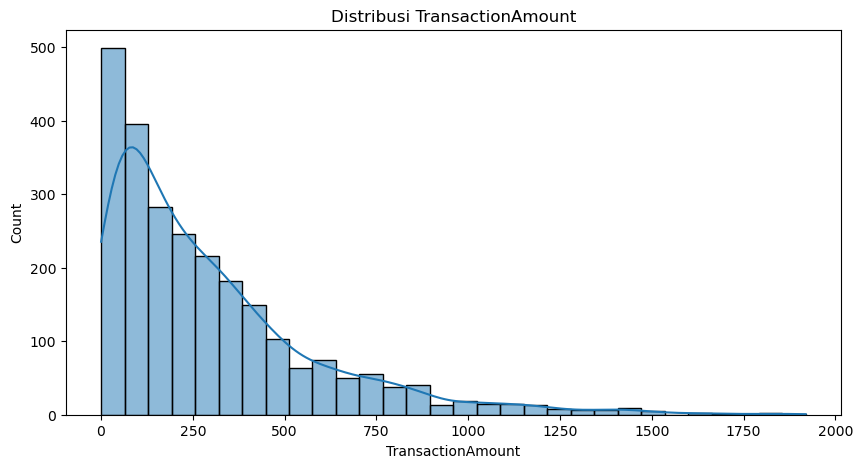

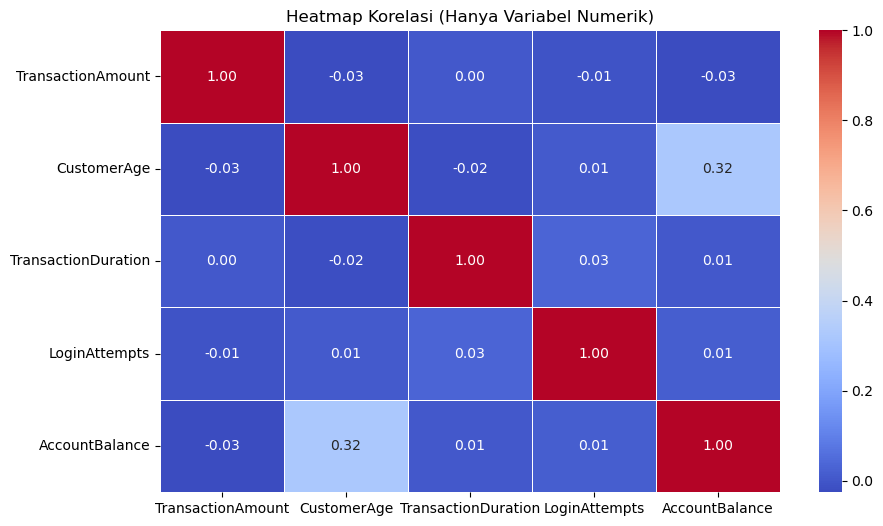

In [3]:
# Memahami Struktur Data
print(df.info())  # Menampilkan informasi dataset
print(df.describe())  # Statistik deskriptif

# Menangani Data yang Hilang
print(df.isnull().sum())  # Mengecek missing values
df.dropna(inplace=True)   # Menghapus baris dengan missing values

# Analisis Distribusi dan Korelasi
plt.figure(figsize=(10, 5))
sns.histplot(df["TransactionAmount"], bins=30, kde=True)
plt.title("Distribusi TransactionAmount")
plt.show()

numerical_cols = df.select_dtypes(include=["number"]).columns  # Pilih kolom numerik saja
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi (Hanya Variabel Numerik)")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [4]:
# Konversi kolom tanggal
if "TransactionDate" in df.columns:
    df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])

# Encoding variabel kategorikal
label_encoders = {}
categorical_cols = ["TransactionType", "Channel", "CustomerOccupation"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalisasi fitur numerik
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [5]:
# Pembangunan Model Clustering
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans_final.fit_predict(df[numerical_cols])

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

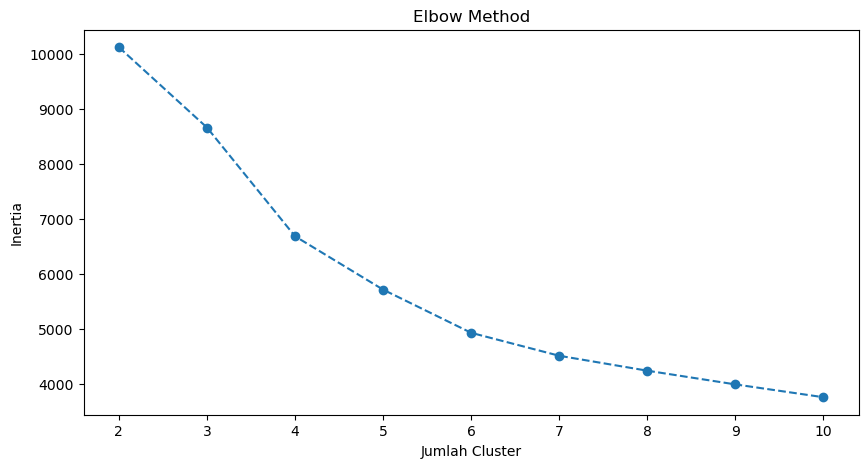

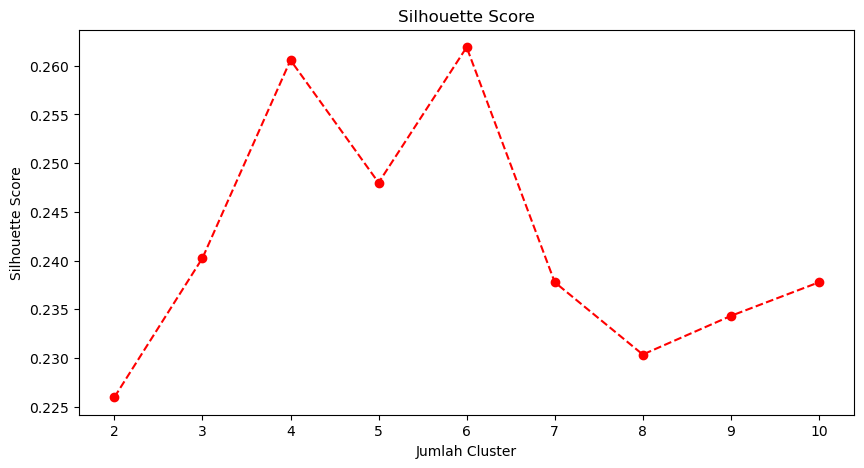

Silhouette Score untuk K=3: 0.2402523702763911


In [6]:
# Elbow Method
X = df[numerical_cols]  # Menggunakan hanya fitur numerik
cluster_range = range(2, 11)
inertia = []
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

# Evaluasi dengan Silhouette Score
silhouette_avg = silhouette_score(X, df["Cluster"])
print(f"Silhouette Score untuk K={optimal_k}: {silhouette_avg}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

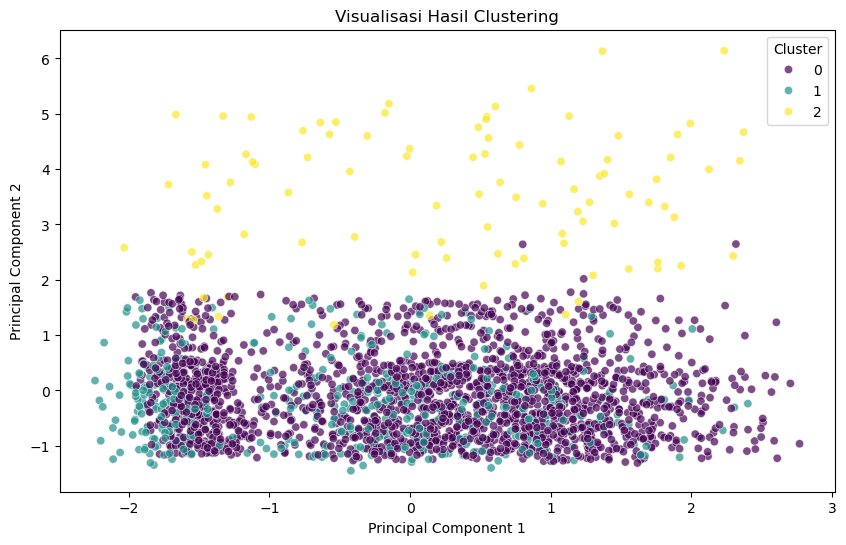

In [7]:
# Visualisasi hasil clustering dengan PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = df["Cluster"]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster", palette="viridis", alpha=0.7)
plt.title("Visualisasi Hasil Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [8]:
# Tambahkan Hasil Label Cluster ke DataFrame
df["Cluster"] = kmeans_final.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [9]:
# Inverse Data Jika Melakukan Normalisasi/Standarisasi
df_original = df.copy()

# Mengembalikan data ke skala aslinya untuk interpretasi
df_original[numerical_cols] = scaler.inverse_transform(df[numerical_cols])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [10]:
# Analisis Karakteristik Tiap Cluster
cluster_summary = df_original.groupby("Cluster")[numerical_cols].mean()
cluster_summary["Count"] = df["Cluster"].value_counts()

print(" Rata-rata Fitur dalam Tiap Cluster:")
print(cluster_summary)

 Rata-rata Fitur dalam Tiap Cluster:
         TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
Cluster                                                                       
0               179.424606    45.454922           119.600518       1.011399   
1               770.051889    41.605749           117.425051       1.010267   
2               276.324316    44.536842           131.884211       4.010526   

         AccountBalance  Count  
Cluster                         
0           5256.963389   1930  
1           4481.177864    487  
2           5461.643053     95  


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Transaction Amount:** -0.404844   
- **Rata-rata Customer Age:** 0.043902 
- **Rata-rata Transaction Duration:** -0.000612 
- **Rata-rata Login Attempts:** -0.187876
- **Rata-rata Account Balance:** 0.036578
- **Jumlah Data dalam Cluster:** 1,930
- **Analisis:** Cluster ini mencakup pelanggan dengan jumlah transaksi yang lebih rendah dibanding rata-rata, tetapi dengan saldo akun yang sedikit lebih tinggi. Usia pelanggan dalam cluster ini cenderung normal, dan mereka tidak melakukan terlalu banyak percobaan login. Cluster ini mungkin berisi pelanggan yang melakukan transaksi dalam jumlah kecil tetapi memiliki kestabilan saldo yang relatif baik.

## Cluster 1:
- **Rata-rata Transaction Amount:** 1.618627   
- **Rata-rata Customer Age:** -0.172482 
- **Rata-rata Transaction Duration:** -0.031712 
- **Rata-rata Login Attempts:** -0.189754
- **Rata-rata Account Balance:** -0.162333
- **Jumlah Data dalam Cluster:** 487 
- **Analisis:** Cluster ini berisi pelanggan dengan jumlah transaksi yang jauh lebih tinggi dibanding rata-rata, tetapi memiliki saldo akun yang lebih rendah. Pelanggan dalam cluster ini cenderung lebih muda dibanding rata-rata dan memiliki durasi transaksi yang lebih singkat. Hal ini dapat menunjukkan bahwa kelompok ini terdiri dari pelanggan dengan perilaku transaksi yang lebih agresif atau sering bertransaksi dalam jumlah besar namun dengan saldo yang lebih terbatas.

## Cluster 2:
- **Rata-rata Transaction Amount:** -0.072869   
- **Rata-rata Customer Age:** -0.007708 
- **Rata-rata Transaction Duration:** 0.174995 
- **Rata-rata Login Attempts:** 4.789580
- **Rata-rata Account Balance:** 0.089058
- **Jumlah Data dalam Cluster:** 95 
- **Analisis:** Cluster ini menarik karena memiliki jumlah percobaan login yang jauh lebih tinggi dibanding cluster lainnya. Sementara jumlah transaksi dan saldo akun relatif normal, pelanggan dalam cluster ini mungkin mengalami kesulitan mengakses akun mereka atau memiliki pola login yang mencurigakan. Cluster ini bisa jadi mencakup pengguna yang memiliki risiko keamanan lebih tinggi, seperti akun yang sering mengalami kegagalan login atau aktivitas tidak biasa.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Menyimpan hasil clustering ke file CSV
df.to_csv('clustered_data.csv', index=False)
print('File clustered_data.csv berhasil disimpan.')